# Introduction<a class='anchor' id='ch0'></a>
<div style="font-size:120%"> 
    <b>Outline:</b> 
    <b>Goal:</b> We have to predict obesity risk in individuals.<br><br>
    <b>Dataset Description:</b>
</div>

| Column | Full Form | Description| 
|---|---|---|
| 'id'| id | Unique for each person(row)|
|'Gender'| Gender| person's Gender|
| 'Age' | Age| Dtype is float. Age is between 14 years to 61 years |
|'Height'| Height | Height is in meter it's between 1.45m to 1.98m|
| 'Weight' | Weight| Weight is between 39 to 165. I think it's in KG.|
|'family_history_with_overweight'| family history <br> with overweight| yes or no question|
| 'FAVC'| Frequent consumption <br> of high calorie food| it's yes or no question. i think question they asked is <br>do you consume high calorie food|
|'FCVC'|  Frequency of <br>consumption of vegetables| Similar to FAVC. this is also `yes or no` question|
|'NCP'| Number of main meals| dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 <br>but our data is synthetic so it's taking float values|
|'CAEC'| Consumption of <br>food between meals| takes 4 values `Sometimes`, `Frequently`, `no` & `Always` <br>|
| 'SMOKE'| Smoke | yes or no question. i think the question is "Do you smoke?" |
|'CH2O'| Consumption of <br>water daily| CH2O takes values between 1 & 3. again it's given as <br>float may be because of synthetic data. it's values should be 1,2 or 3|
|'SCC'|  Calories consumption <br>monitoring| yes or no question|
|'FAF'| Physical activity <br>frequency| FAF is between 0 to 3, 0 means no physical activity<br> and 3 means high workout. and again, in our data it's given as float|
|'TUE'| Time using <br>technology devices| TUE is between 0 to 2. I think question will be "How long you have <br>been using technology devices to track your health." in our data it's given as float |
|'CALC'| Consumption of alcohol | Takes 3 values: `Sometimes`, `no`, `Frequently`|
| 'MTRANS' | Transportation used| MTRANS takes 5 values `Public_Transportation`, `Automobile`, <br>`Walking`, `Motorbike`, & `Bike`|
|'NObeyesdad'| TARGET | This is our target, takes 7 values, and in this comp. we have to give <br>the class name (Not the Probability, which is the case in most comp.)


<div style="font-size:120%"> 
    <b>NObeyesdad (Target Variable):</b>
</div>

* Insufficient_Weight : Less than 18.5
* Normal_Weight       : 18.5 to 24.9
* Obesity_Type_I      : 30.0 to 34.9
* Obesity_Type_II     : 35.0 to 39.9
* Obesity_Type_III   : Higher than 40
* Overweight_Level_I, Overweight_Level_II takes values between 25 to 29

# Import Libraries

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Load Data

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
original_data = pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")
sample_submission_data = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

# Merge Data

In [4]:
train_data = train_data.drop("id", axis=1)
train_data = pd.concat([train_data, original_data], ignore_index=True)
train_data = train_data.drop_duplicates()
train_data.shape

(22845, 17)

In [5]:
num_cols = list(train_data.select_dtypes(exclude=['object']).columns)
cat_cols = list(train_data.select_dtypes(include=['object']).columns)

num_cols_test = list(test_data.select_dtypes(exclude=['object']).columns)
cat_cols_test = list(test_data.select_dtypes(include=['object']).columns)

num_cols_test = [col for col in num_cols_test if col not in ['id']]

# EDA

## Target Variable

### NObeyesdad

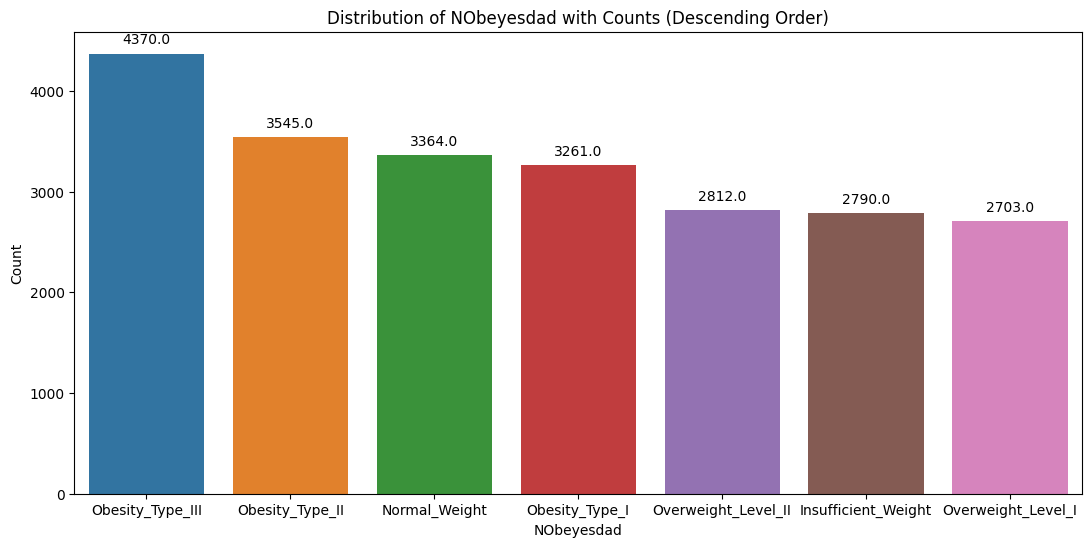

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "NObeyesdad" is a categorical column
plt.figure(figsize=(13, 6))

# Get the unique values of 'NObeyesdad' and sort them by counts in descending order
order = train_data['NObeyesdad'].value_counts().index

# Create the countplot with specified order
ax = sns.countplot(x='NObeyesdad', data=train_data, order=order)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of NObeyesdad with Counts (Descending Order)')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()

## Categorical Features

## Gender

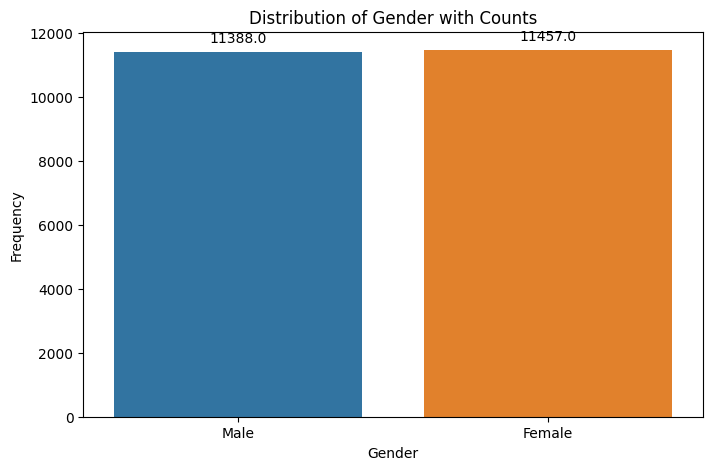

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "Gender" is a categorical column
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=train_data)

# Display values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Gender with Counts')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

## family_history_with_overweight

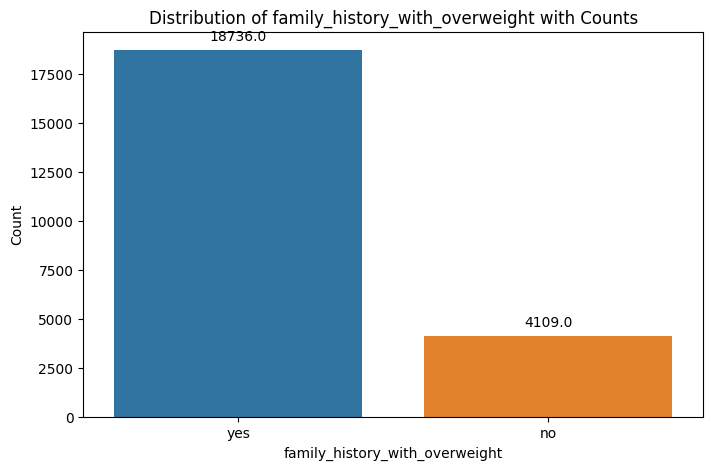

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "family_history_with_overweight" is a categorical column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='family_history_with_overweight', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of family_history_with_overweight with Counts')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.show()

## FAVC

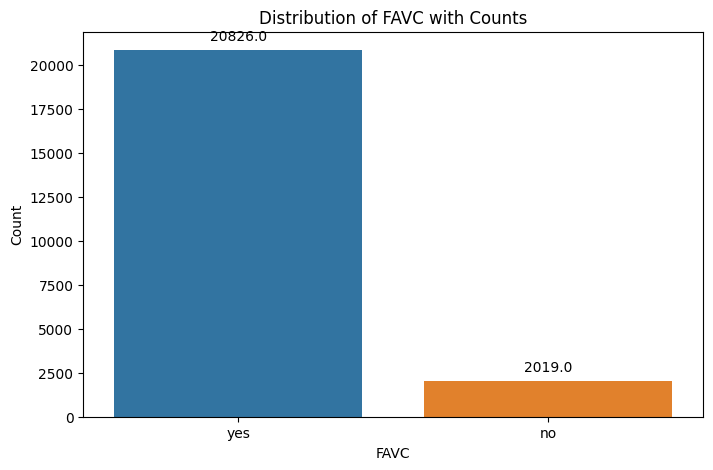

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "FAVC" is a categorical column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='FAVC', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of FAVC with Counts')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.show()

## CAEC

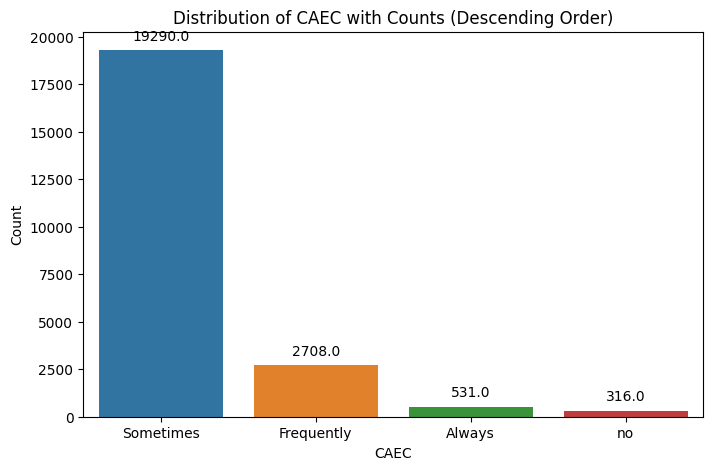

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "CAEC" is a categorical column
plt.figure(figsize=(8, 5))

# Get the unique values of 'CAEC' and sort them by counts in descending order
order = train_data['CAEC'].value_counts().index

# Create the countplot with specified order
ax = sns.countplot(x='CAEC', data=train_data, order=order)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of CAEC with Counts (Descending Order)')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()

## SMOKE

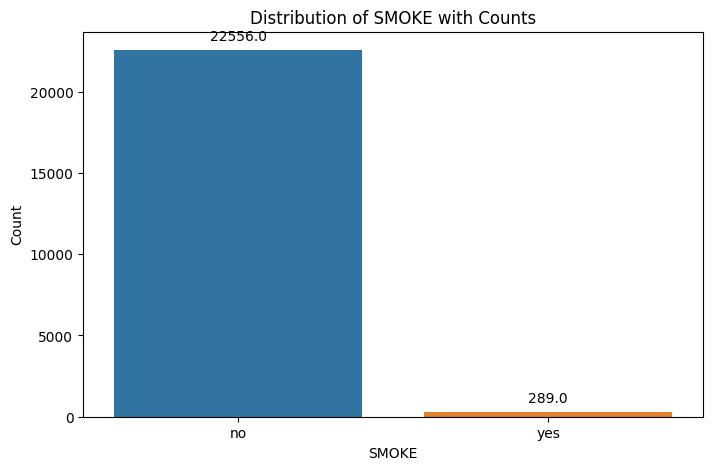

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "SMOKE" is a categorical column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='SMOKE', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of SMOKE with Counts')
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.show()

## SCC

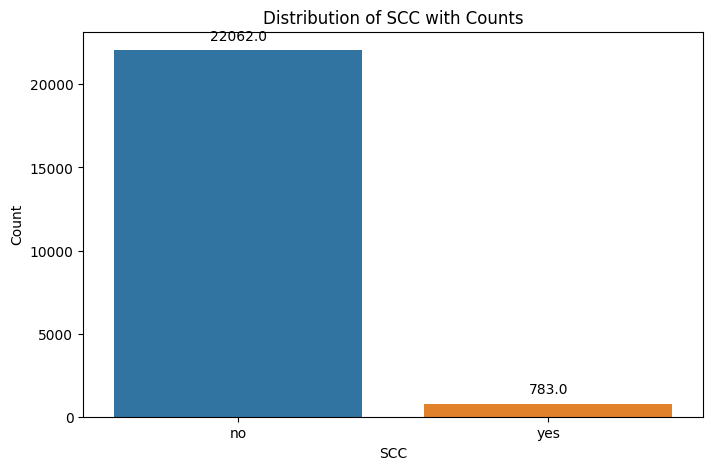

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "SCC" is a categorical column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='SCC', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of SCC with Counts')
plt.xlabel('SCC')
plt.ylabel('Count')
plt.show()

## CALC

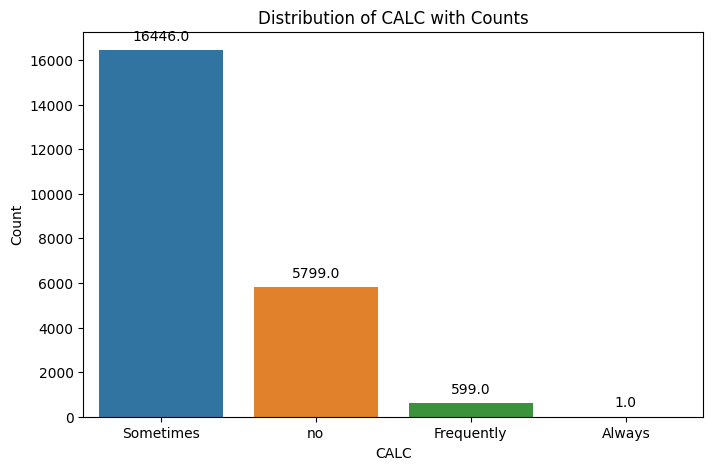

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "CALC" is a categorical column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='CALC', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of CALC with Counts')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.show()

## MTRANS

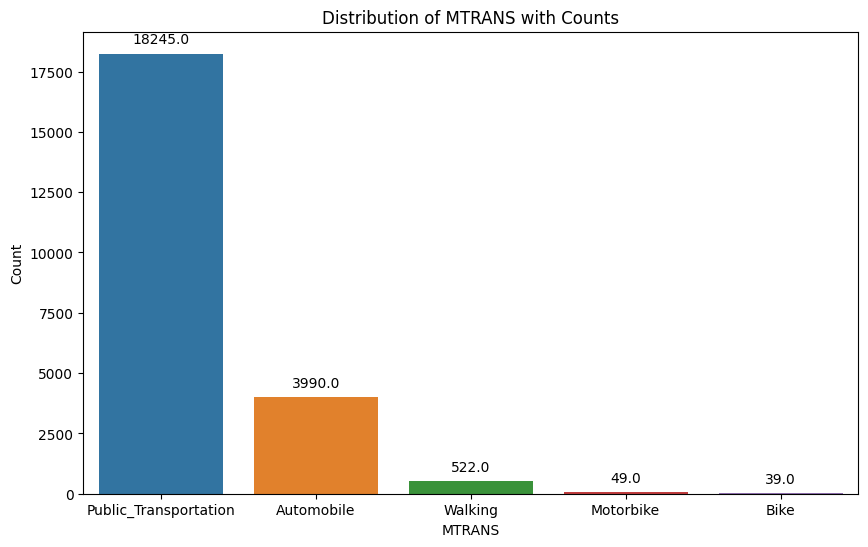

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "MTRANS" is a categorical column
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MTRANS', data=train_data)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of MTRANS with Counts')
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.show()

## Numerical Features

### Age

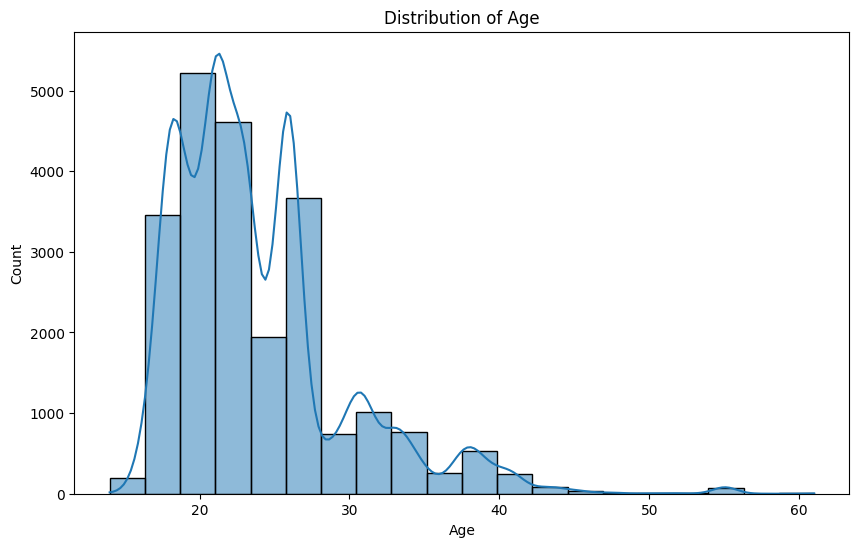

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "Age" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Height

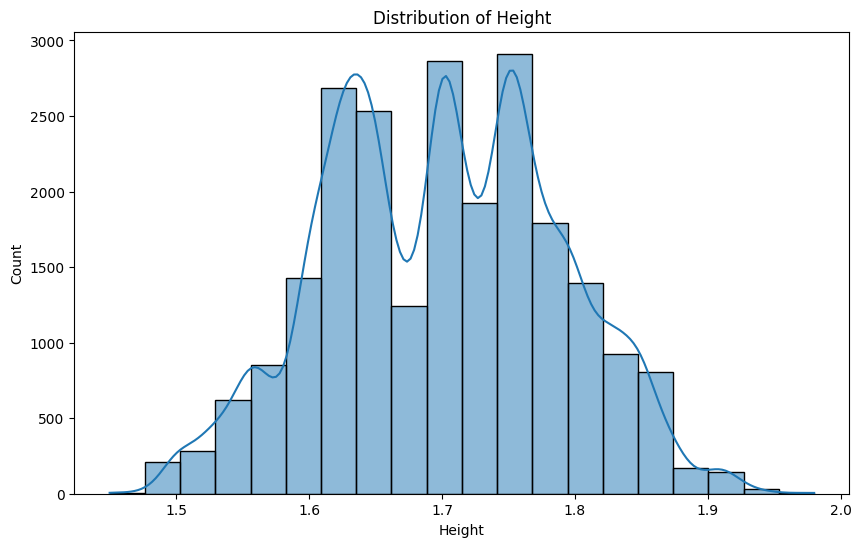

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "Height" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Height'], bins=20, kde=True)

plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

### Weight

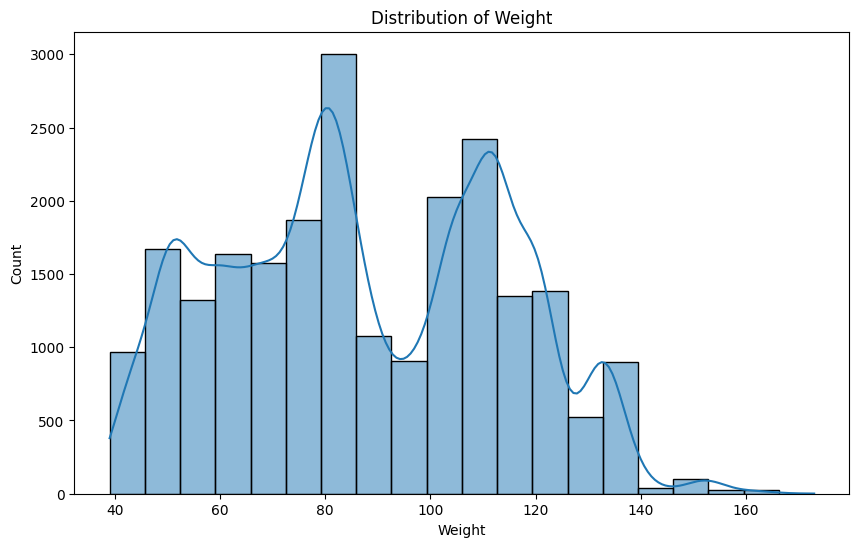

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "Weight" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Weight'], bins=20, kde=True)

plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

### FCVC

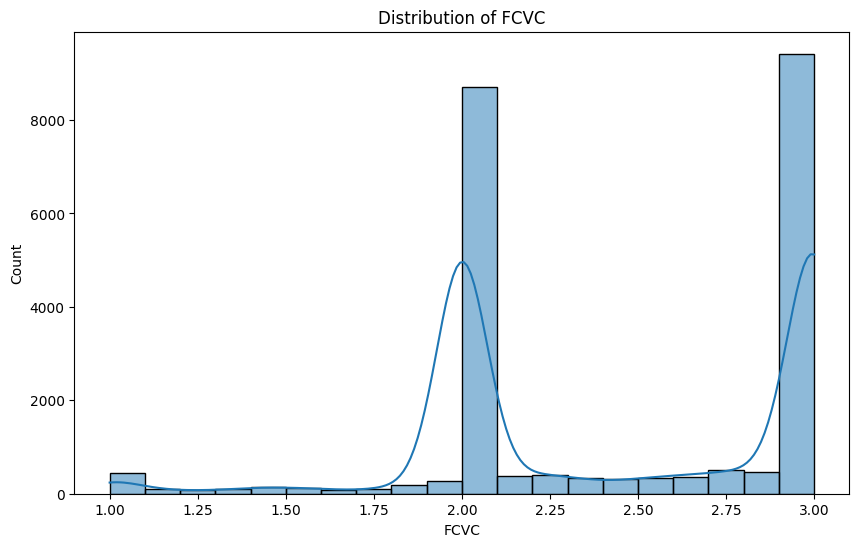

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "FCVC" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['FCVC'], bins=20, kde=True)

plt.title('Distribution of FCVC')
plt.xlabel('FCVC')
plt.ylabel('Count')
plt.show()

### NCP

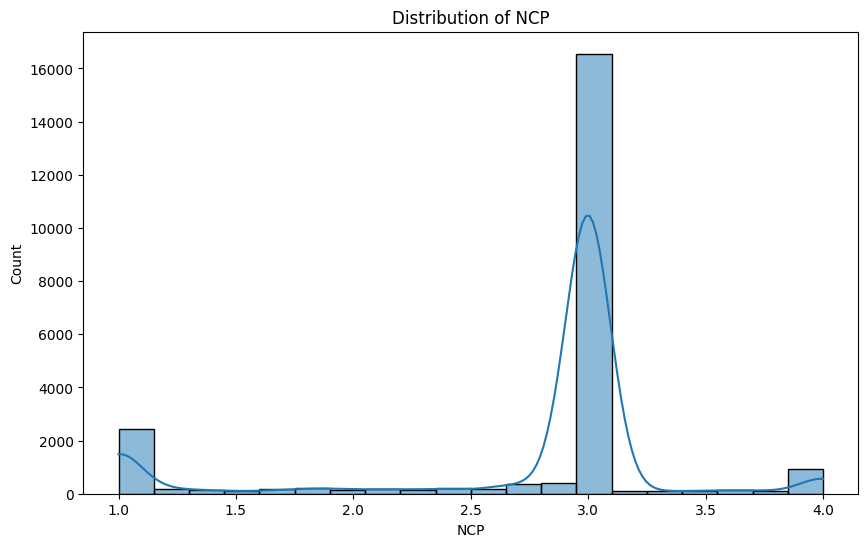

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "NCP" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['NCP'], bins=20, kde=True)

plt.title('Distribution of NCP')
plt.xlabel('NCP')
plt.ylabel('Count')
plt.show()

### CH2O

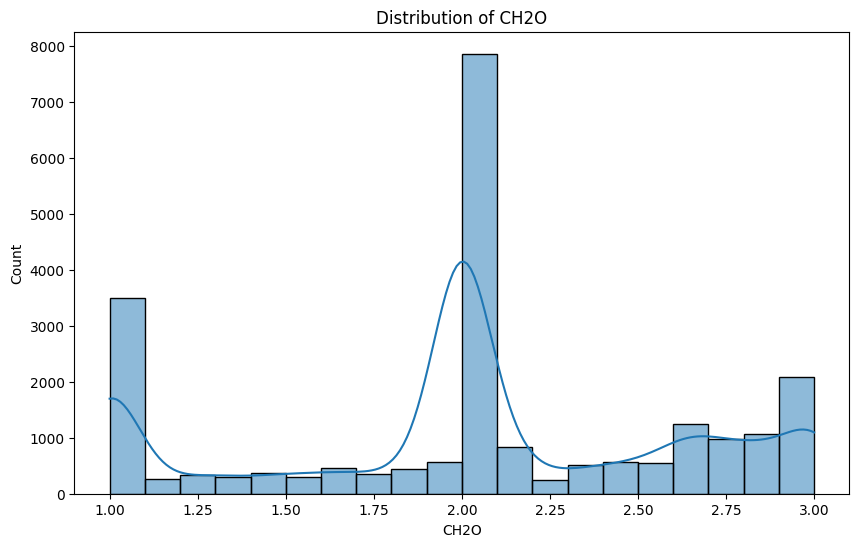

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "CH2O" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['CH2O'], bins=20, kde=True)

plt.title('Distribution of CH2O')
plt.xlabel('CH2O')
plt.ylabel('Count')
plt.show()

### FAF

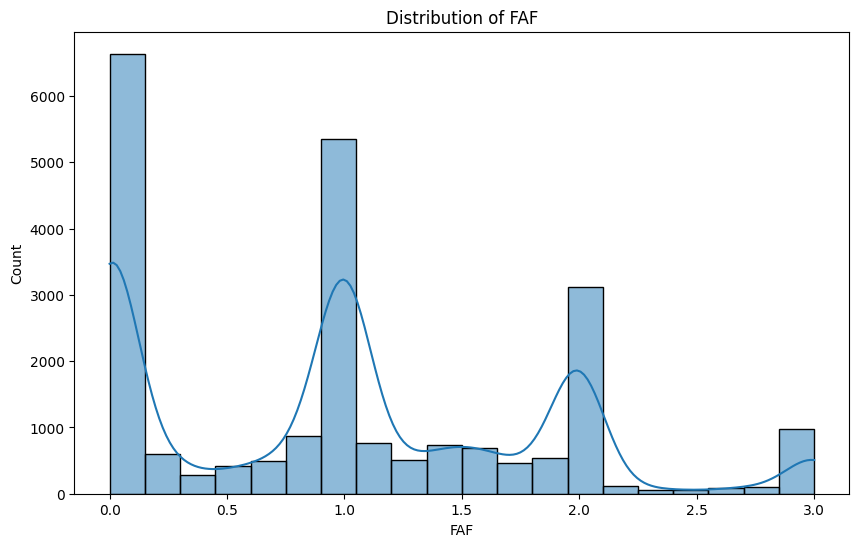

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "FAF" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['FAF'], bins=20, kde=True)

plt.title('Distribution of FAF')
plt.xlabel('FAF')
plt.ylabel('Count')
plt.show()

### TUE

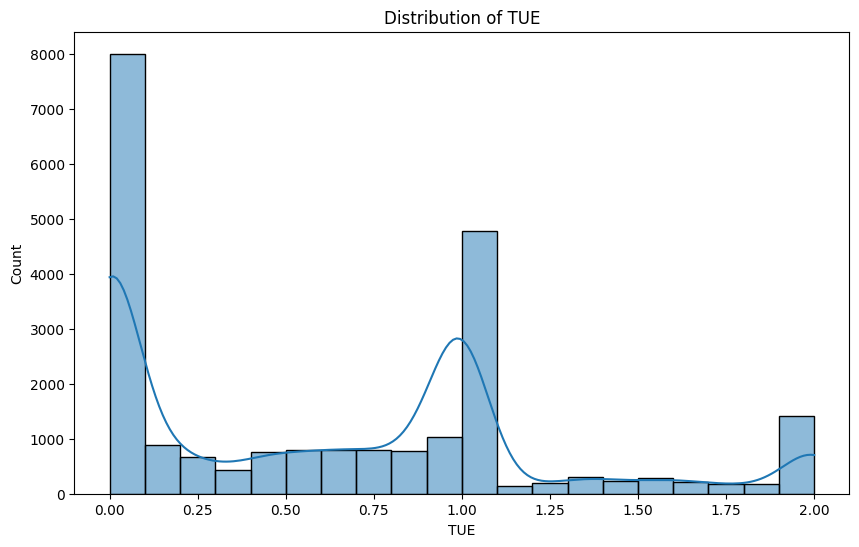

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "TUE" is a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['TUE'], bins=20, kde=True)

plt.title('Distribution of TUE')
plt.xlabel('TUE')
plt.ylabel('Count')
plt.show()

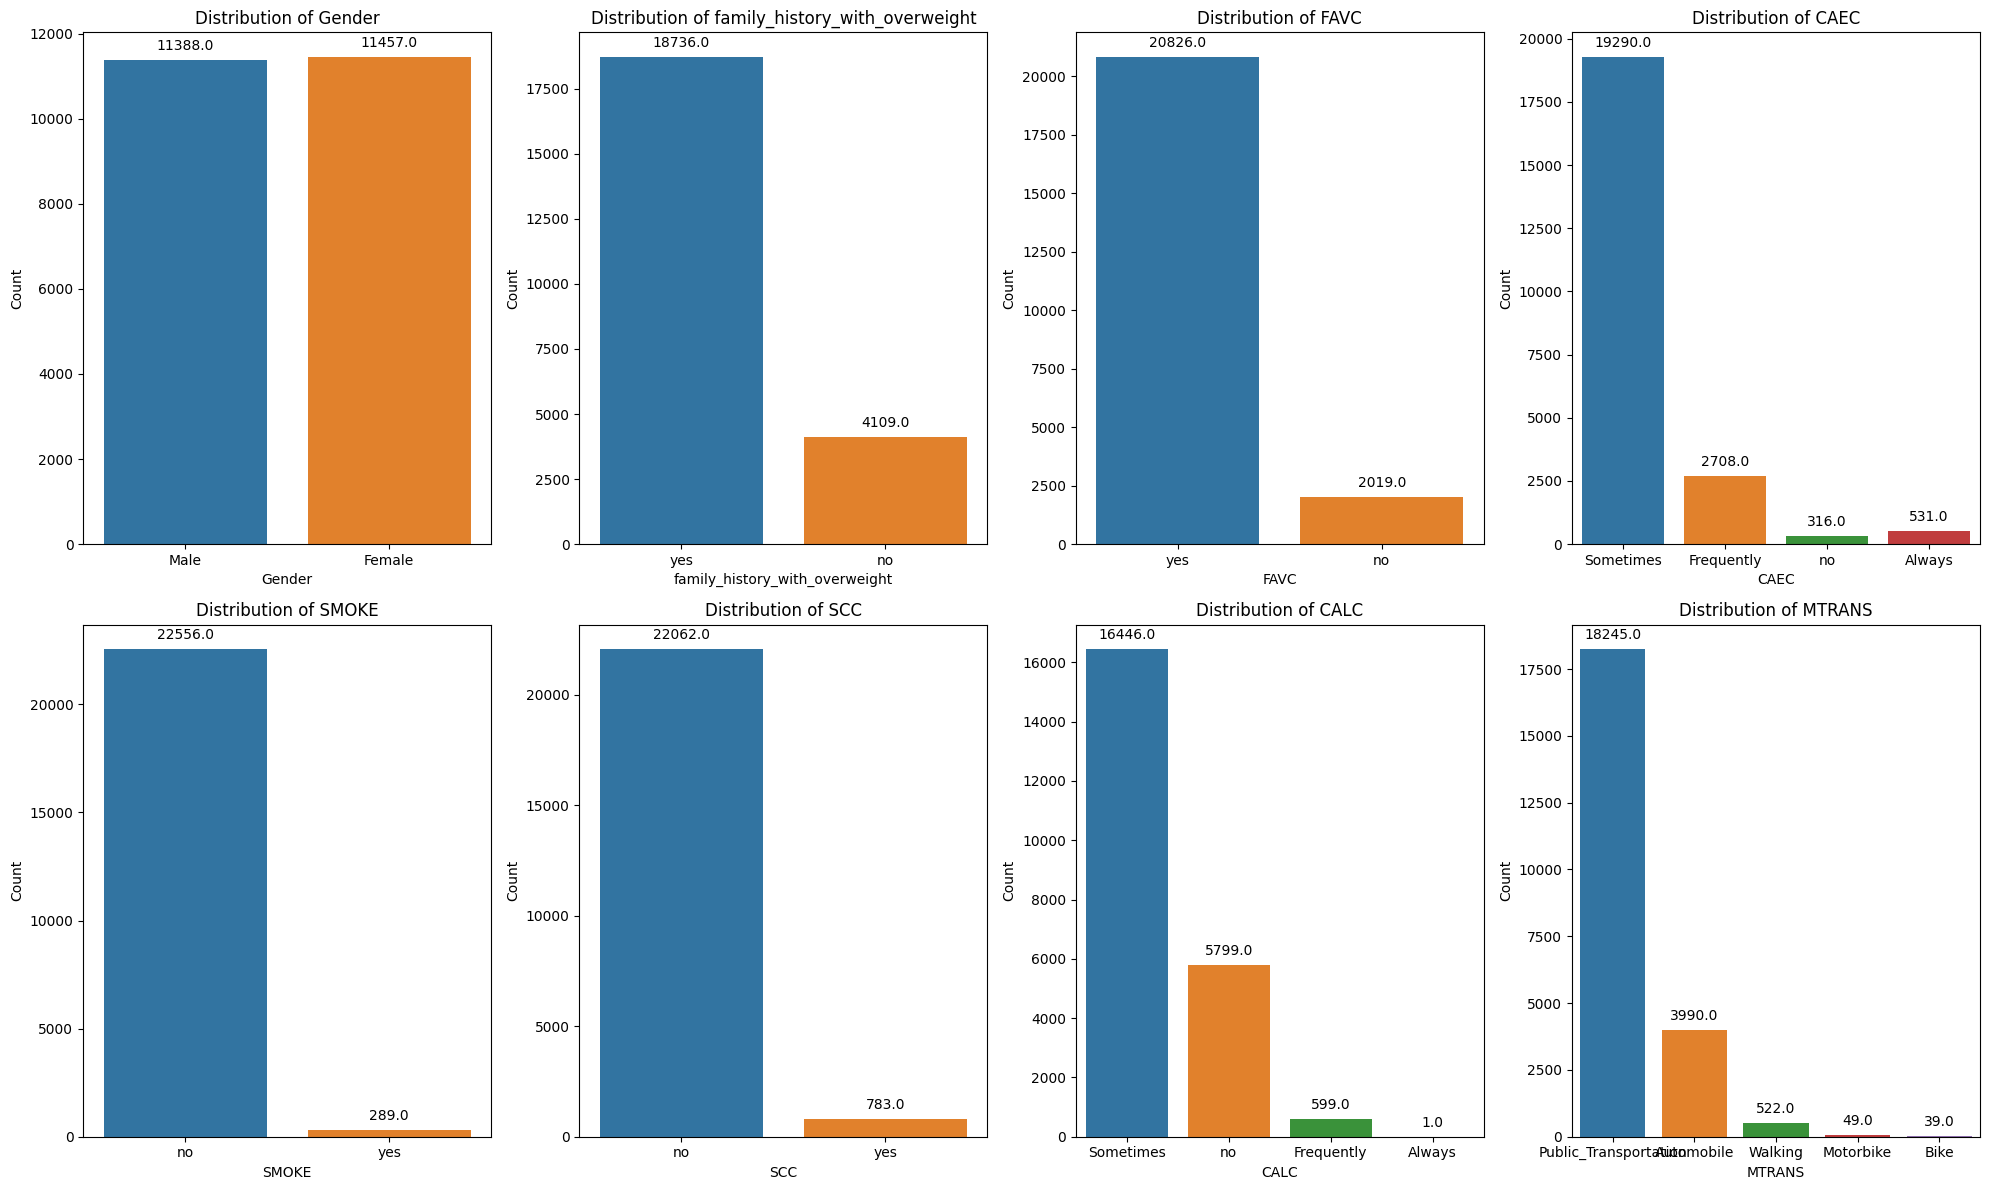

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Set up subplots in a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and plot countplots with annotations
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Display values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

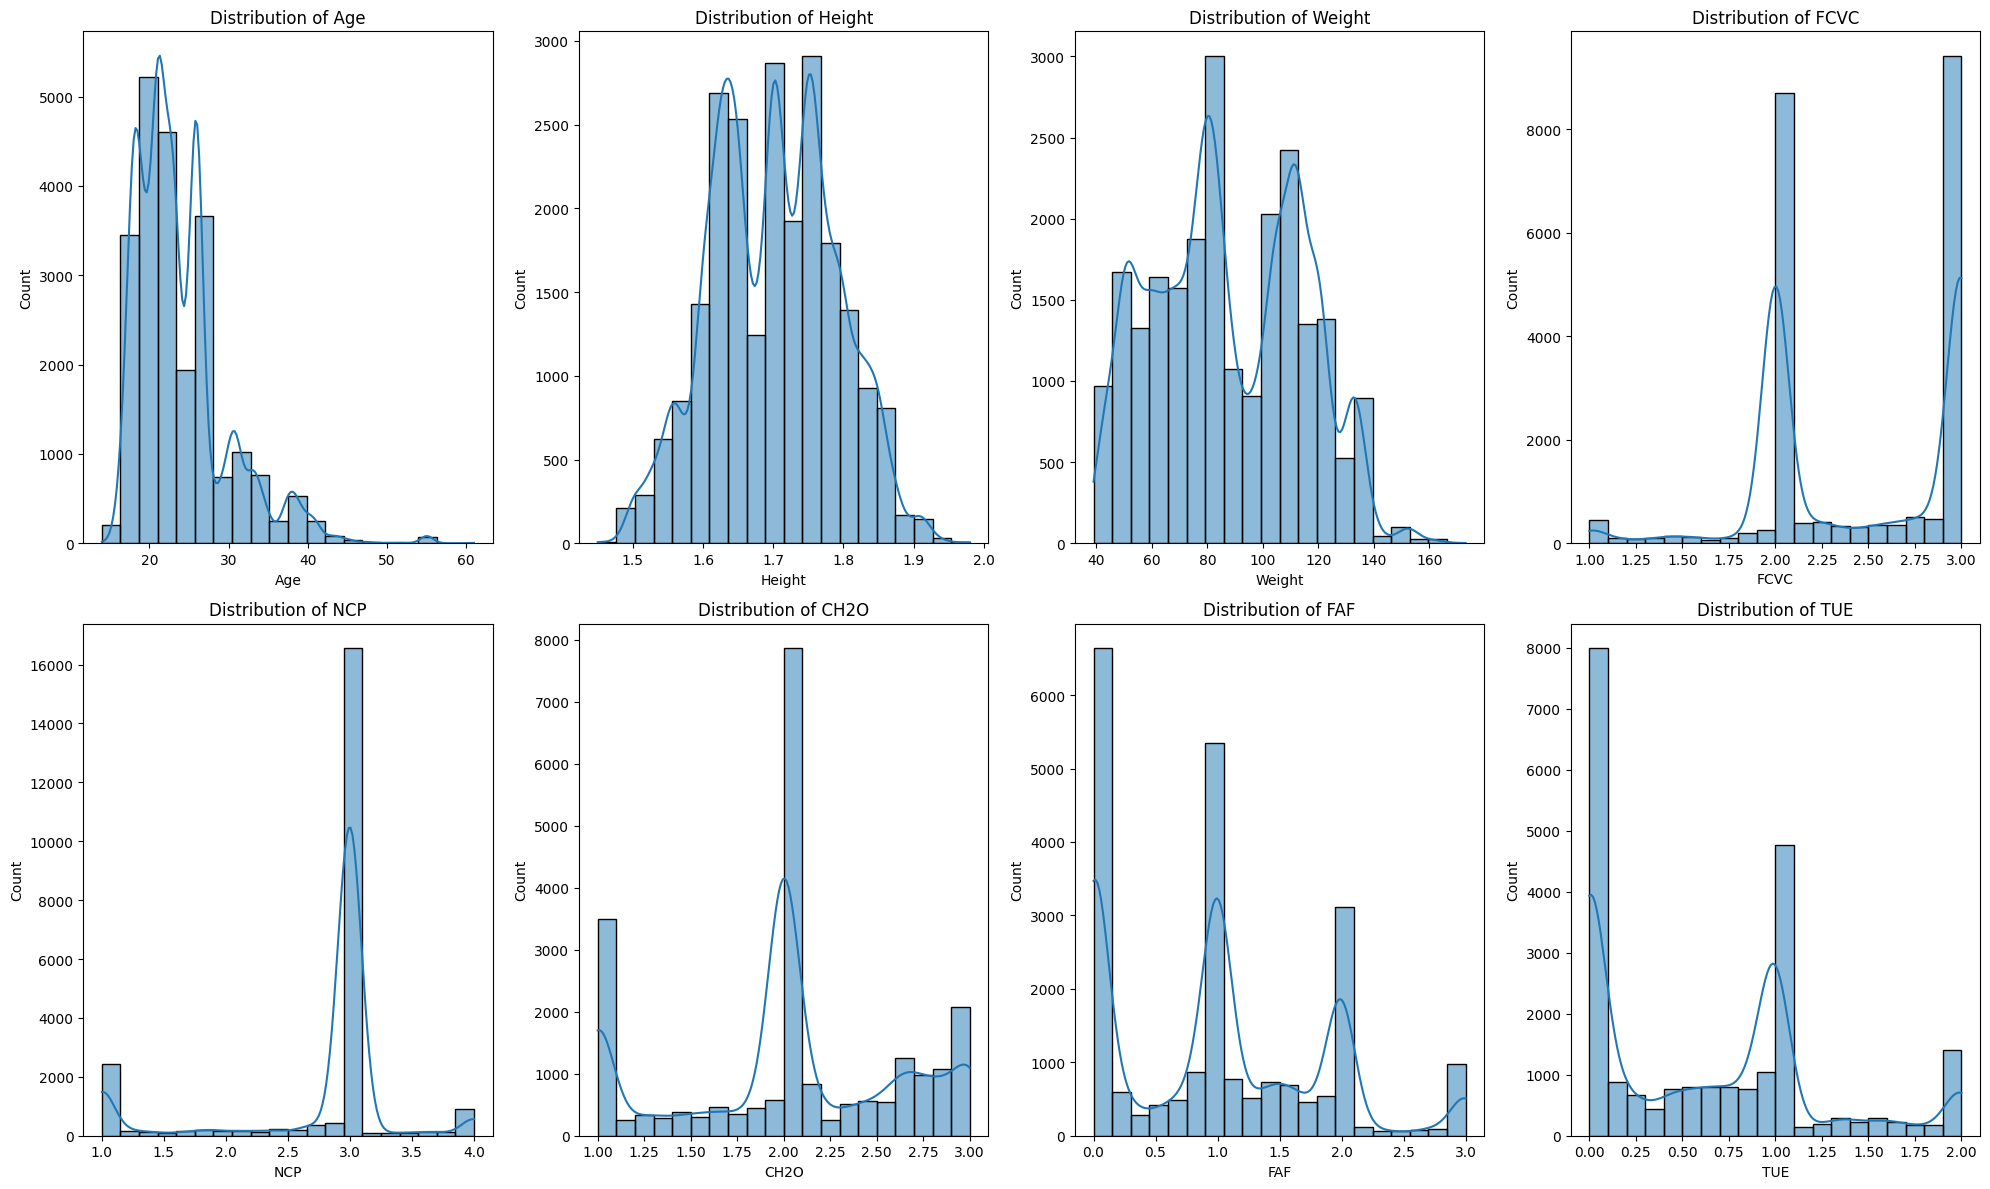

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Set up subplots in a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical column and plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(train_data[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

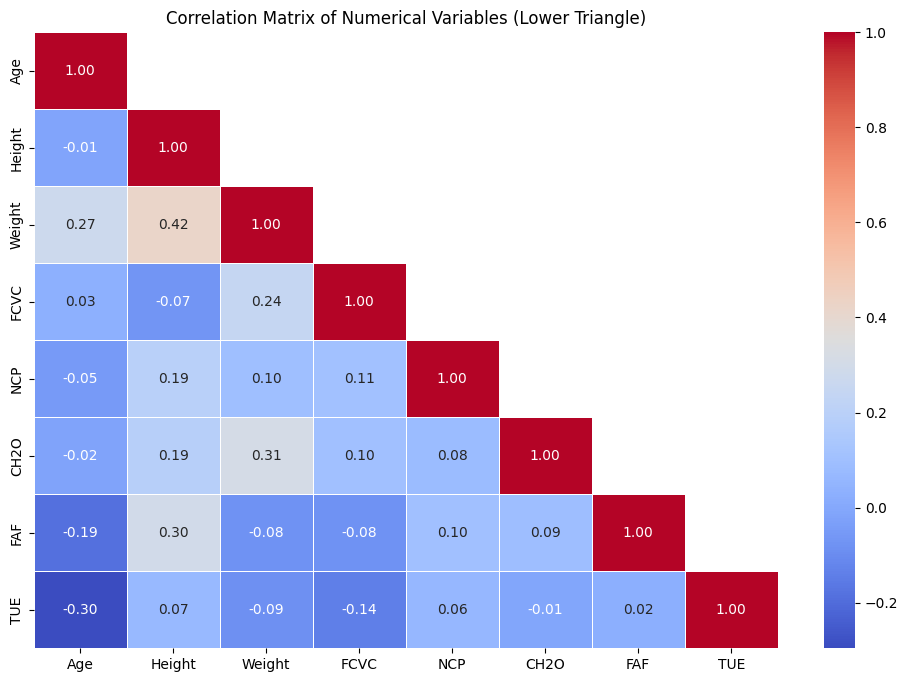

In [27]:
# Compute the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn with the mask applied
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

# Set the title
plt.title('Correlation Matrix of Numerical Variables (Lower Triangle)')

# Show the plot
plt.show()

# Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols_test] = scaler.transform(test_data[num_cols_test])

In [ ]:
#  object datatype columns encoding:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
object_columns = train_data.select_dtypes(include='object').columns.difference(['NObeyesdad'])

for col_name in object_columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name]=labelencoder.fit_transform(train_data[col_name])
        
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        test_data[col_name]=labelencoder.fit_transform(test_data[col_name])

In [ ]:
X = train_data.drop(['NObeyesdad'], axis=1)
y = train_data['NObeyesdad']
y = labelencoder.fit_transform(y)
X_test = test_data.drop(["id"],axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
param = {"objective": "multiclass",          
    "metric": "multi_logloss",          
    "verbosity": -1,                    
    "boosting_type": "gbdt",            
    "random_state": 42,       
    "num_class": 7,                     
    'learning_rate': 0.030962211546832760,  
    'n_estimators': 500,                
    'lambda_l1': 0.009667446568254372,  
    'lambda_l2': 0.04018641437301800,   
    'max_depth': 10,                    
    'colsample_bytree': 0.40977129346872643,  
    'subsample': 0.9535797422450176,   
    'min_child_samples': 26}

model_lgb = lgb.LGBMClassifier(**param,verbose=100)
model_lgb.fit(X_train, y_train)
pred_lgb = model_lgb.predict(X_val)
pred_proba = model_lgb.predict_proba(X_val)

In [ ]:
import optuna

def objective(trial):
    # Define the thresholds for each class
    thresholds = {}
    for i in range(num_classes):
        thresholds[f'threshold_{i}'] = trial.suggest_uniform(f'threshold_{i}', 0.0, 1.0)

    # Apply the thresholds to convert probabilities to predictions
    y_pred = apply_thresholds(pred_proba, thresholds)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy  

def apply_thresholds(y_proba, thresholds):
    # Apply the specified thresholds to convert probabilities to predicted labels
    y_pred_labels = np.argmax(y_proba, axis=1)
    for i in range(y_proba.shape[1]):
        y_pred_labels[y_proba[:, i] > thresholds[f'threshold_{i}']] = i

    return y_pred_labels

In [ ]:
num_classes = 7
pred_proba = pred_proba  # Example: replace with actual y_pred_proba
y_val = y_val  # Example: replace with actual y_val

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# # Get the best thresholds
best_thresholds = study.best_params
print("Best Thresholds:", best_thresholds)

In [ ]:
threshold= {'threshold_0': 0.724201213234911, 'threshold_1': 0.6161299800571379, 'threshold_2': 0.29138887902587174, 'threshold_3': 0.3145837593497076, 'threshold_4': 0.8469398340837189, 'threshold_5': 0.6800824438387787, 'threshold_6': 0.35886959729223455}

In [ ]:
test_label = model_lgb.predict_proba(X_test)
test_label = apply_thresholds(test_label, threshold)

In [ ]:
pred = labelencoder.inverse_transform(test_label)
submission = pd.DataFrame({'id': test_data.id, 'NObeyesdad': pred})
submission.to_csv('submission.csv', index=False)